In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Wrangling

In [ ]:
# read and show some rows 
df = pd.read_csv('../input/dogecoin-tweets-250k/Tweets-Dogecoin.csv')

df.head()

,date,time,timezone,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,video,thumbnail,reply_to
0,20-04-2021,17:57:09,530,sunnyepposo,congrats ✨,I invested $16k a couple of weeks ago when a l...,en,None,['http://discord.gg/5zwNm6Kn9v'],['https://pbs.twimg.com/media/EzaspZBVEAMHmZE....,0,0,0,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']",['doge'],1,https://pbs.twimg.com/media/EzaspZBVEAMHmZE.jpg,None
1,20-04-2021,17:57:07,530,pickndng,andrea || busy sa exams at pts kuno🍀✨,Bought in for $16k. My #dogecoin will make me ...,en,None,['http://discord.gg/5zwNm6Kn9v'],['https://pbs.twimg.com/media/EzaspdbVgAgSD_D....,0,0,0,"['dogecoin', 'doge', 'dogeday']",None,1,https://pbs.twimg.com/media/EzaspdbVgAgSD_D.jpg,None
2,20-04-2021,17:57:07,530,s4y4n9_semu4,#SayangiSemesta,I invested $16k a couple of weeks ago when a l...,en,None,['http://discord.gg/5zwNm6Kn9v'],['https://pbs.twimg.com/media/EzaspfMVoAAmNIi....,0,0,0,"['dogeday420', 'dogeday', 'doge420', 'dogecoin']",['doge'],1,https://pbs.twimg.com/media/EzaspfMVoAAmNIi.jpg,None
3,20-04-2021,17:57:06,530,dogecoinsky,dogecoinsky,"looking back in 2010/11, BTC had low value, hi...",en,None,None,None,0,0,0,"['dogecoin', 'dogeday', 'dogecoinsky']",None,0,NaN,None
4,20-04-2021,17:57:04,530,dogeman0401,jay,Looks like the hype of today isn’t coming to f...,en,None,None,None,0,0,0,"['doge420', 'dogeday420', 'doge', 'dogecoin']",None,0,NaN,None


**Tweets start from [2021-04-16]**

In [ ]:
# show last 5 rows
df.tail()

,date,time,timezone,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,video,thumbnail,reply_to
250004,16-04-2021,06:01:13,530,rwied44,OutToLunch,#dogecoin reaches $0.20! https://t.co/yBkUBC3xRI,en,None,None,['https://pbs.twimg.com/media/EzDibwEWgAQkKB7....,0,0,0,['dogecoin'],None,1,https://pbs.twimg.com/media/EzDibwEWgAQkKB7.jpg,None
250005,16-04-2021,06:01:12,530,rtx933,rtx933,#dogecoin #LATOKEN https://t.co/CiR47MT9Qz,und,None,None,['https://pbs.twimg.com/media/EzDiblNVgAA2x6g....,0,0,0,"['dogecoin', 'latoken']",None,1,https://pbs.twimg.com/media/EzDiblNVgAA2x6g.jpg,None
250006,16-04-2021,06:01:12,530,grababagceo,Brandon Jones,#dogecoin community is unlike any on the plane...,en,"[{'screen_name': 'elonmusk', 'name': 'elon mus...",None,None,0,0,2,"['dogecoin', 'moon', 'tesla', 'dogecointo1doll...",None,0,NaN,None
250007,16-04-2021,06:01:11,530,rizedogecoin,DogecoinRizing 🌏🌙🌖,Doge Prediction: Up #dogecoin,en,None,None,None,0,0,4,['dogecoin'],None,0,NaN,None
250008,16-04-2021,06:01:10,530,thehandiimanaz,youknowhowibe,@BeefSupreme1776 Did you read the article? To ...,en,None,['https://finance.yahoo.com/news/inflation-inf...,None,0,0,0,"['dogecoin', 'doge', 'dogearmy', 'dogecointoth...",None,0,NaN,"[{'screen_name': 'BeefSupreme1776', 'name': 'B..."


**Tweets ends at [2021-4-20]**

**so we have tweets from 250K seconds window.**

In [ ]:
# show tweets data size
df.shape

(250009, 18)

## Data Preprocessing

In [ ]:
df['dt'] = df['date'] + ' ' + df['time']
df.dt = pd.to_datetime(df.dt)
df = df.sort_values('dt').reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250009 entries, 0 to 250008
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            250009 non-null  object        
 1   time            250009 non-null  object        
 2   timezone        250009 non-null  int64         
 3   username        250009 non-null  object        
 4   name            250003 non-null  object        
 5   tweet           250009 non-null  object        
 6   language        250009 non-null  object        
 7   mentions        250009 non-null  object        
 8   urls            250009 non-null  object        
 9   photos          250009 non-null  object        
 10  replies_count   250009 non-null  int64         
 11  retweets_count  250009 non-null  int64         
 12  likes_count     250009 non-null  int64         
 13  hashtags        250009 non-null  object        
 14  cashtags        250009 non-null  obj

## Data Cleaning

In [ ]:
# drop unnecessary columns
df = df[['dt', 'tweet']]

df.rename(columns={'dt': 'date', 'tweet':'text'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250009 entries, 0 to 250008
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    250009 non-null  datetime64[ns]
 1   text    250009 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.8+ MB


In [ ]:
# show some rows
df.head()

,date,text
0,2021-04-16 06:01:10,@BeefSupreme1776 Did you read the article? To ...
1,2021-04-16 06:01:11,Doge Prediction: Up #dogecoin
2,2021-04-16 06:01:12,#dogecoin #LATOKEN https://t.co/CiR47MT9Qz
3,2021-04-16 06:01:12,#dogecoin community is unlike any on the plane...
4,2021-04-16 06:01:13,#dogecoin reaches $0.20! https://t.co/yBkUBC3xRI


### Clean [TEXT] column

In [ ]:
# show tweet
t = df.text[0]
t

'@BeefSupreme1776 Did you read the article? To get to $1 we only have to get to about 55% of the market cap of ethereum. A lot of people are cashing out their coins and stocks and buying #dogecoin #doge #dogearmy #DogecoinToTheMoon    https://t.co/ms6bNVmTf0'

In [ ]:
# helper function
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    #tweet = re.sub('#[A-Za-z0-9]+', '', tweet) # removes any string with a '#'
    #tweet = re.sub('\n', '', tweet) # removes the '\n' string
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = remove_emojis(tweet)
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet.strip()

In [ ]:
import re
import emoji
import nltk
from tqdm import tqdm

cleaner(t)

'Did you read the article? To get to $1 we only have to get to about 55% of the market cap of ethereum. A lot of people are cashing out their coins and stocks and buying dogecoin doge dogearmy DogecoinToTheMoon'

In [ ]:
# apply cleaner
clean_tweets = []
for tweet in tqdm(df.text):
    ct = cleaner(tweet)
    clean_tweets.append(ct)
    
df['clean_text'] = clean_tweets
df['clean_text'][:5]

100%|██████████| 250009/250009 [00:05<00:00, 46620.75it/s]


0    Did you read the article? To get to $1 we only...
1                         Doge Prediction: Up dogecoin
2                                     dogecoin LATOKEN
3    dogecoin community is unlike any on the planet...
4                              dogecoin reaches $0.20!
Name: clean_text, dtype: object

## SentiStrength

In [ ]:
# SentiStrength helper
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_negative"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neutral"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_positive"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    #df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df

In [ ]:
# compute vader scores
vader_negative = []
vader_neutral = []
vader_positive = []

sia = SentimentIntensityAnalyzer()
for tweet in tqdm(df.text):
    ps = sia.polarity_scores(tweet)
    vader_negative.append(ps['neg'])
    vader_neutral.append(ps['neu'])
    vader_positive.append(ps['pos'])
    
df['vader_negative'] = vader_negative
df['vader_neutral'] = vader_neutral
df['vader_positive'] = vader_positive

100%|██████████| 250009/250009 [00:59<00:00, 4216.67it/s]


### Features Engineering

In [ ]:
def tweet_length(tweet):
    return len(tweet.split(' '))

# apply tweet length
tweet_lengths = []
for tweet in tqdm(df.text):
    tl = tweet_length(tweet)
    tweet_lengths.append(tl)
    
df['tweet_length'] = tweet_lengths
df['tweet_length'][:5]

100%|██████████| 250009/250009 [00:00<00:00, 485169.24it/s]


0    45
1     4
2     4
3    21
4     5
Name: tweet_length, dtype: int64

In [ ]:
def vader_scale(score, scale=4):
    scale_ = 1. / scale
    return int((score // scale_))

# apply vader scale
vader_scales = []
for score in tqdm(df.vader_neutral):
    tl = vader_scale(score)
    vader_scales.append(tl)
    
df['vader_scale'] = vader_scales
df['vader_scale'][:5]

100%|██████████| 250009/250009 [00:00<00:00, 857465.06it/s]


0    4
1    4
2    4
3    4
4    2
Name: vader_scale, dtype: int64

In [ ]:
df.vader_scale.value_counts()

4    136312
3     74136
2     35100
1      4259
0       202
Name: vader_scale, dtype: int64

In [ ]:
df.head()

,date,text,clean_text,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale
0,2021-04-16 06:01:10,@BeefSupreme1776 Did you read the article? To ...,Did you read the article? To get to $1 we only...,0.0,1.000,0.000,45,4
1,2021-04-16 06:01:11,Doge Prediction: Up #dogecoin,Doge Prediction: Up dogecoin,0.0,1.000,0.000,4,4
2,2021-04-16 06:01:12,#dogecoin #LATOKEN https://t.co/CiR47MT9Qz,dogecoin LATOKEN,0.0,1.000,0.000,4,4
3,2021-04-16 06:01:12,#dogecoin community is unlike any on the plane...,dogecoin community is unlike any on the planet...,0.0,1.000,0.000,21,4
4,2021-04-16 06:01:13,#dogecoin reaches $0.20! https://t.co/yBkUBC3xRI,dogecoin reaches $0.20!,0.0,0.668,0.332,5,2


In [ ]:
df.tail()

,date,text,clean_text,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale
250004,2021-04-20 17:57:04,Looks like the hype of today isn’t coming to f...,Looks like the hype of today isn’t coming to f...,0.00,0.839,0.161,14,3
250005,2021-04-20 17:57:06,"looking back in 2010/11, BTC had low value, hi...","looking back in 2010/11, BTC had low value, hi...",0.06,0.840,0.100,52,3
250006,2021-04-20 17:57:07,I invested $16k a couple of weeks ago when a l...,I invested $16k a couple of weeks ago when a l...,0.00,1.000,0.000,39,4
250007,2021-04-20 17:57:07,Bought in for $16k. My #dogecoin will make me ...,Bought in for $16k. My dogecoin will make me a...,0.07,0.930,0.000,40,3
250008,2021-04-20 17:57:09,I invested $16k a couple of weeks ago when a l...,I invested $16k a couple of weeks ago when a l...,0.00,1.000,0.000,39,4


In [ ]:
df.to_csv('dogecoin-text-tweets-sentiment-fe.csv', index=False)

In [ ]:
#df

In [ ]:
# extract tweets sentiments per minute
sentiment_df = df.groupby(pd.Grouper(key='date',freq='min')).mean()

# extract No. of tweets per minute
tweet_vol = df.groupby(pd.Grouper(key='date',freq='min')).count()['text']

In [ ]:
# add tweets count
sentiment_df['tweets_vol'] = tweet_vol

# show some sentiment rows
sentiment_df.head()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol
date,,,,,,
2021-04-16 06:01:00,0.017187,0.911794,0.071019,13.700935,3.495327,107
2021-04-16 06:02:00,0.036131,0.897935,0.065935,14.214953,3.420561,107
2021-04-16 06:03:00,0.031773,0.902023,0.066216,14.261364,3.431818,88
2021-04-16 06:04:00,0.026615,0.912115,0.061271,15.020833,3.479167,96
2021-04-16 06:05:00,0.009549,0.878044,0.112385,12.109890,3.340659,91


In [ ]:
sentiment_df.describe()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol
count,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000,6477.000000
mean,0.032682,0.897577,0.069737,19.593620,3.364856,38.599506
std,0.016778,0.028453,0.025435,3.830871,0.162558,31.057114
min,0.000000,0.708667,0.000000,9.123077,2.500000,4.000000
25%,0.020784,0.880556,0.052596,17.000000,3.266667,21.000000
50%,0.030974,0.898784,0.068185,19.384615,3.373134,30.000000
75%,0.042407,0.916076,0.084826,21.937500,3.469136,43.000000
max,0.135143,1.000000,0.280667,42.677419,4.000000,360.000000


In [ ]:
sentiment_df.isna().sum()

vader_negative    0
vader_neutral     0
vader_positive    0
tweet_length      0
vader_scale       0
tweets_vol        0
dtype: int64

In [ ]:
sentiment_df.shape

(6477, 6)

In [ ]:
(sentiment_df.tweets_vol > 0).sum()

6477

## Data wrangling [Prices]

In [ ]:
df = pd.read_csv('../input/dogecoinprices/full_data__4__2021.csv')
df.head()

,Unnamed: 0,timestamp,Asset_ID,Asset_Name,Weight,Count,Open,High,Low,Close,Volume,VWAP,Target
0,18935915,1609459260,4,NaN,NaN,84.0,0.004671,0.004683,0.004668,0.004677,2.202482e+06,0.004675,-0.008679
1,18935929,1609459320,4,NaN,NaN,23.0,0.004683,0.004686,0.004669,0.004672,6.446365e+05,0.004676,-0.006432
2,18935943,1609459380,4,NaN,NaN,11.0,0.004670,0.004676,0.004668,0.004672,5.196483e+05,0.004671,-0.006881
3,18935957,1609459440,4,NaN,NaN,38.0,0.004675,0.004682,0.004667,0.004672,7.038264e+05,0.004672,-0.007622
4,18935971,1609459500,4,NaN,NaN,19.0,0.004670,0.004674,0.004668,0.004671,4.305936e+05,0.004670,-0.007321


### Data Preprocessing

In [1]:
from datetime import datetime

def return_datetime(timestamp):
    return datetime.fromtimestamp(timestamp)

df['date'] = df['timestamp'].apply(return_datetime)

NameError: ignored

In [ ]:
cols = ['date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[cols]
df.head()

In [ ]:
prices_df = df.groupby(pd.Grouper(key='date',freq='min')).mean()[['Close']]

In [ ]:
max_date = sentiment_df.index.max()
min_date = sentiment_df.index.min()

min_date, max_date

In [ ]:
prices_df = prices_df[min_date:max_date]
prices_df.head()

In [ ]:
sentiment_df.shape, prices_df.shape

In [ ]:
doge = sentiment_df.join(prices_df, on='date')
doge.head()

In [ ]:
doge.isna().sum()

In [ ]:
doge.to_csv('doge-tweets-sentiment-prices.csv', index=True)

In [ ]:
doge.describe()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(doge.iloc[:, 0] );
ax[0].set(title='Vader Negative')
ax[1].plot(doge.iloc[:, -1] );
ax[1].set(title='Close Prices')
plt.legend();

## Neural Network 

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

### Date Split

In [ ]:
X = doge.iloc[:, :-1].values
y = doge[['Close']].values

train_split = 0.9
data_len = int(y.shape[0] * train_split)

X_train = X[:data_len]
y_train = y[:data_len]
X_test = X[data_len:]
y_test = y[data_len:]

### Add TimeStamp

In [ ]:
sr = 2
lb = 60*sr # minutes

train_gen = TimeseriesGenerator(X_train, y_train, length=lb, sampling_rate=sr, batch_size=256)
test_gen = TimeseriesGenerator(X_test, y_test, length=lb, sampling_rate=sr, batch_size=128)

In [ ]:
# (look_back, features)
shape = train_gen[0][0].shape[1:]
shape

(60, 6)

### LSTM Model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=shape))
model.add(LSTM(4,))
model.add(Dense(1,))

# model summary
model.summary()

2022-01-05 08:11:51.584099: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 08:11:51.672068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 08:11:51.672764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-05 08:11:51.673871: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 32)            4992      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 592       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 5,589
Trainable params: 5,589
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [ ]:
# model callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, restore_best_weights=True)
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

# loss function
huber_loss = tf.keras.losses.Huber()
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

# Traning
history = model.fit(train_gen, 
                    validation_data=test_gen, 
                    callbacks=[es, reduce_lr],
                    epochs=1000,
                    verbose=1,
                   )

2022-01-05 08:11:55.106811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000


2022-01-05 08:11:58.221600: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - 5s 36ms/step - loss: 0.0189 - val_loss: 0.0088
Epoch 2/1000
23/23 [==============================] - 0s 17ms/step - loss: 0.0084 - val_loss: 0.0029
Epoch 3/1000
23/23 [==============================] - 0s 15ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 4/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 5/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 6/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 7/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 8/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 8.3878e-04
Epoch 9/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 10/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 8.099

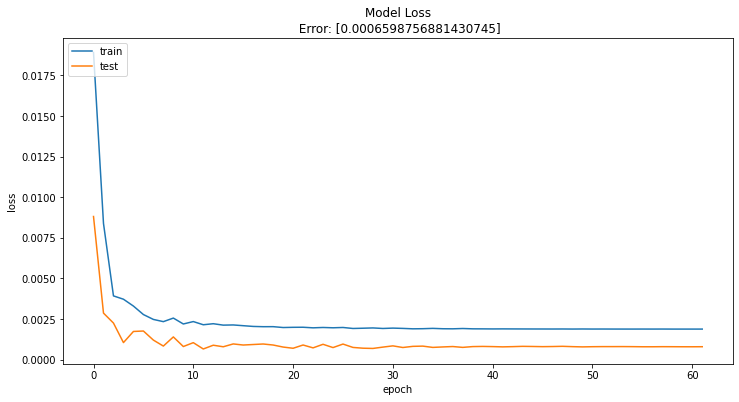

In [ ]:
# summarize history for loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f"Model Loss\n Error: [{np.min(history.history['val_loss'])}]")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test Model

In [ ]:
# predict and compare
pred = model.predict(test_gen)
true = y_test[lb:]

print('Real Mean-Aabsolute-Error:', np.mean(abs(pred-true)))

Real Mean-Aabsolute-Error: 0.022390364042278725


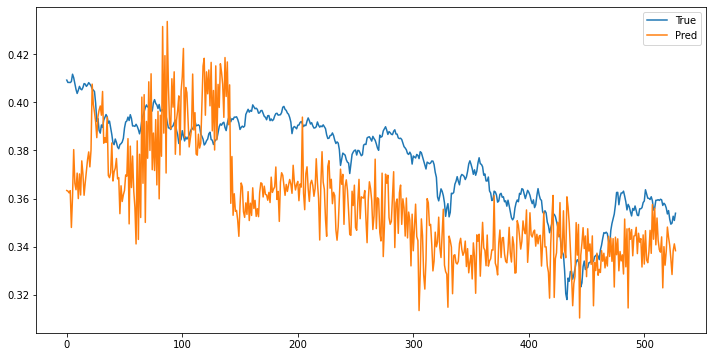

In [ ]:
# plot the results
plt.figure(figsize=(12, 6))
plt.plot(true, label='True');
plt.plot(pred, label='Pred')
plt.legend();

**Conclusions**

Mean-Aabsolute-Error is reasonable **and**, 

## **Our model realize the Volatility in prices (ups and down) very well.**

